In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install apyori
!pip install pyECLAT
from apyori import apriori
from pyECLAT import ECLAT
!pip install mlxtend
from mlxtend.frequent_patterns import fpgrowth

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [37]:
data = pd.read_csv("/home/apiiit123/Downloads/Dataset-Mental-Disorders.csv")
data                   

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [38]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [39]:
data.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [41]:
data.nunique()

Patient Number         120
Sadness                  4
Euphoric                 4
Exhausted                4
Sleep dissorder          4
Mood Swing               2
Suicidal thoughts        3
Anorxia                  2
Authority Respect        2
Try-Explanation          2
Aggressive Response      2
Ignore & Move-On         2
Nervous Break-down       2
Admit Mistakes           2
Overthinking             2
Sexual Activity          9
Concentration            8
Optimisim                9
Expert Diagnose          4
dtype: int64

In [42]:
data.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [43]:
data.shape

(120, 19)

In [44]:
data.size

2280

In [45]:
data.ndim

2

In [46]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of     Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0 

In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [48]:
categorical_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 
                       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 
                       'Authority Respect', 'Try-Explanation', 'Aggressive Response', 
                       'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 
                       'Overthinking']

for col in categorical_columns:
    data[col] = data[col].map({'NO': 0, 'YES': 1, 'Seldom': 1, 'Sometimes': 2, 
                               'Usually': 3, 'Most-Often': 4})


In [49]:
data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,NaN,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,3,1,3,2,0,1.0,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,2,4,2,2,1,0.0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,3,1,3,4,1,1.0,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,3,3,2,2,0,0.0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,4,1,3,2,0,1.0,0,0,1,0,1,0,0,1,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,2,2,2,1,1,0.0,0,0,0,1,0,0,0,1,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,3,2,3,2,1,0.0,1,1,0,0,0,1,0,1,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,3,2,1,1,0,1.0,1,0,1,1,1,0,1,1,7 From 10,7 From 10,7 From 10,Depression


In [50]:
columns = ["Sexual Activity", "Concentration", "Optimisim"]
for column in columns:
    data[column] = data[column].str.extract("(\d+)").astype(int)


<>:3: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \d
/tmp/ipykernel_62282/1849512075.py:3: DeprecationWarning: invalid escape sequence \d
  data[column] = data[column].str.extract("(\d+)").astype(int)


In [51]:
label = LabelEncoder()
data["Expert Diagnose"] = label.fit_transform(data["Expert Diagnose"])

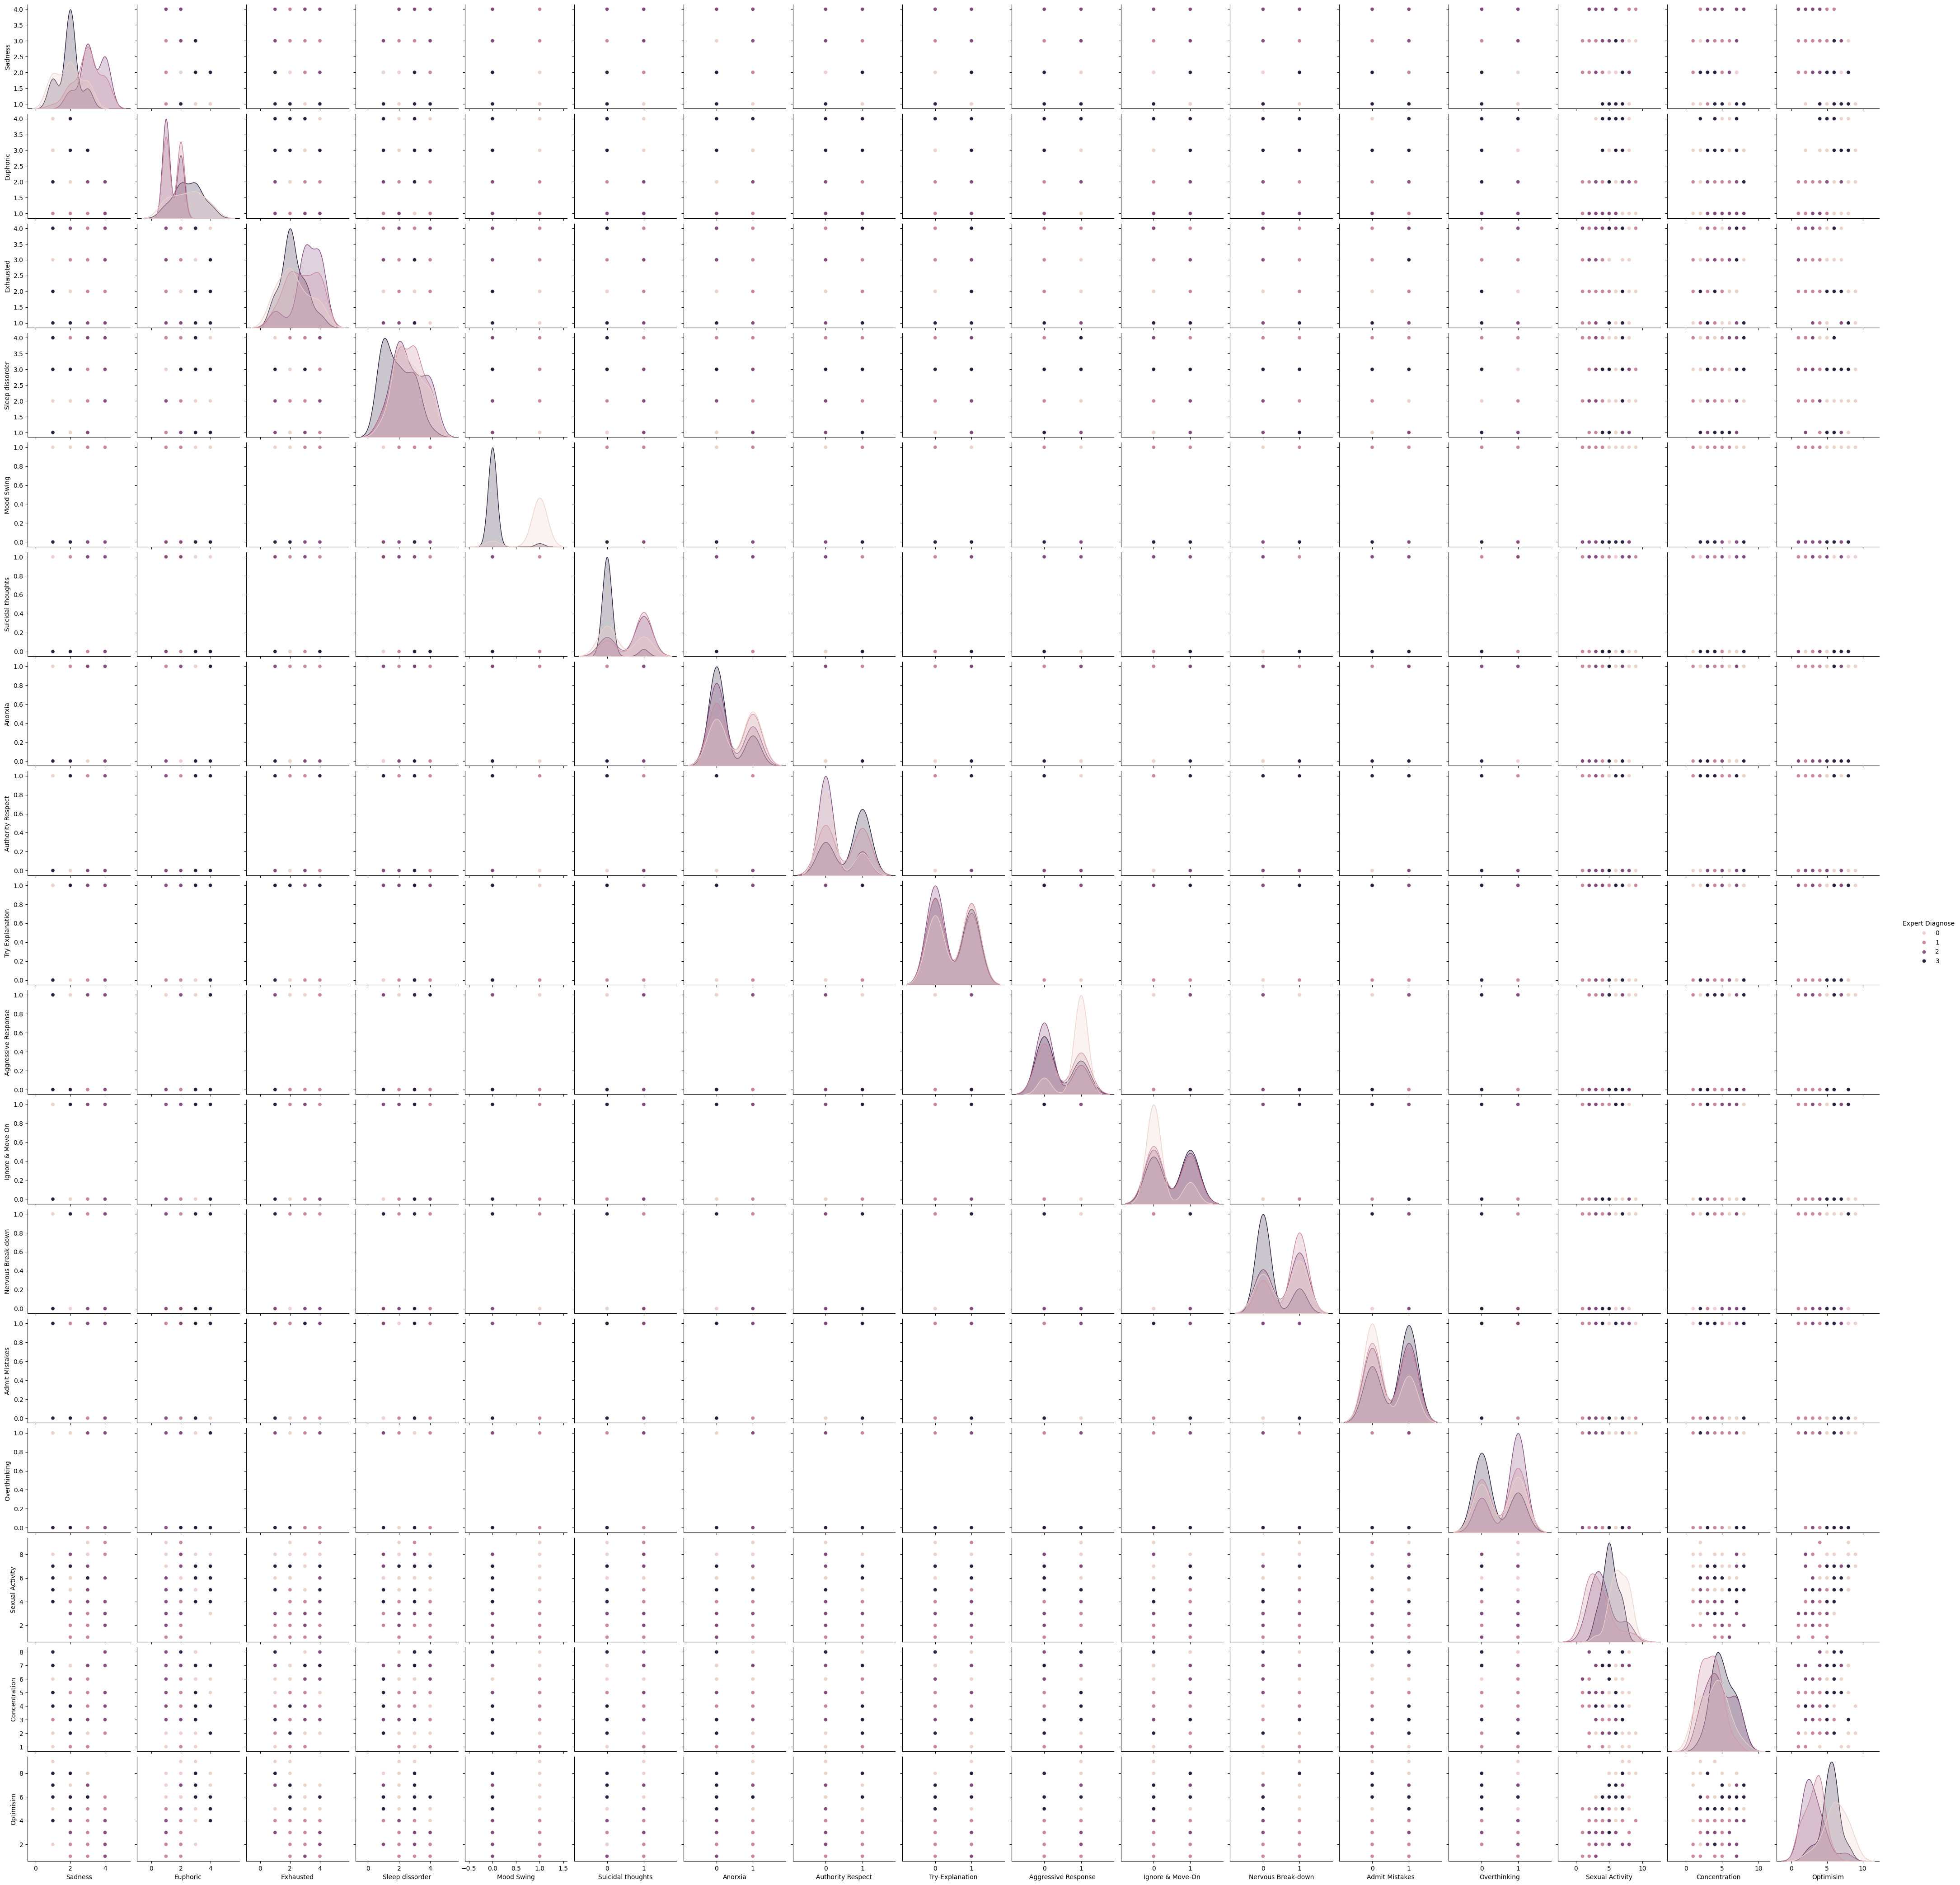

In [52]:
sns.pairplot(data,hue="Expert Diagnose")
plt.show()

In [53]:
df = pd.DataFrame(data)
df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,NaN,0,0,1,0,0,1,1,1,3,3,4,1
1,Patiant-02,3,1,3,2,0,1.0,0,0,0,0,0,0,0,0,4,2,5,2
2,Patiant-03,2,4,2,2,1,0.0,0,0,1,1,0,1,1,0,6,5,7,0
3,Patiant-04,3,1,3,4,1,1.0,1,0,1,0,0,0,0,0,3,2,2,1
4,Patiant-05,3,3,2,2,0,0.0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,4,1,3,2,0,1.0,0,0,1,0,1,0,0,1,2,5,3,2
116,Patiant-117,2,2,2,1,1,0.0,0,0,0,1,0,0,0,1,6,7,8,0
117,Patiant-118,3,2,3,2,1,0.0,1,1,0,0,0,1,0,1,1,5,3,1
118,Patiant-119,3,2,1,1,0,1.0,1,0,1,1,1,0,1,1,7,7,7,2


In [54]:
transactions = [[f"{col}={row[col]}" for col in df.columns[1:] if pd.notnull(row[col])] for _, row in df.iterrows()]
for t in transactions:
    print(t)


['Sadness=3', 'Euphoric=1', 'Exhausted=2', 'Sleep dissorder=2', 'Mood Swing=1', 'Anorxia=0', 'Authority Respect=0', 'Try-Explanation=1', 'Aggressive Response=0', 'Ignore & Move-On=0', 'Nervous Break-down=1', 'Admit Mistakes=1', 'Overthinking=1', 'Sexual Activity=3', 'Concentration=3', 'Optimisim=4', 'Expert Diagnose=1']
['Sadness=3', 'Euphoric=1', 'Exhausted=3', 'Sleep dissorder=2', 'Mood Swing=0', 'Suicidal thoughts=1.0', 'Anorxia=0', 'Authority Respect=0', 'Try-Explanation=0', 'Aggressive Response=0', 'Ignore & Move-On=0', 'Nervous Break-down=0', 'Admit Mistakes=0', 'Overthinking=0', 'Sexual Activity=4', 'Concentration=2', 'Optimisim=5', 'Expert Diagnose=2']
['Sadness=2', 'Euphoric=4', 'Exhausted=2', 'Sleep dissorder=2', 'Mood Swing=1', 'Suicidal thoughts=0.0', 'Anorxia=0', 'Authority Respect=0', 'Try-Explanation=1', 'Aggressive Response=1', 'Ignore & Move-On=0', 'Nervous Break-down=1', 'Admit Mistakes=1', 'Overthinking=0', 'Sexual Activity=6', 'Concentration=5', 'Optimisim=7', 'Expe

In [55]:
from mlxtend.preprocessing import TransactionEncoder
transaction = pd.DataFrame(TransactionEncoder().fit_transform(transactions), columns=TransactionEncoder().fit(transactions).columns_)
rules = apriori(transaction, min_support=0.2)

In [56]:
rules

,support,itemsets
0,0.508333,(0)
1,0.491667,(1)
2,0.516667,(2)
3,0.483333,(3)
4,0.616667,(4)
...,...,...
268,0.208333,"(62, 28, 6)"
269,0.200000,"(28, 6, 63)"
270,0.241667,"(65, 28, 6)"
271,0.225000,"(62, 27, 30)"


In [57]:
frequent_itemsets = fpgrowth(transaction, min_support=0.2, use_colnames=True)

In [58]:
frequent_itemsets

,support,itemsets
0,0.616667,(Anorxia=0)
1,0.608333,(Authority Respect=0)
2,0.583333,(Ignore & Move-On=0)
3,0.541667,(Overthinking=1)
4,0.516667,(Aggressive Response=0)
...,...,...
268,0.225000,"(Admit Mistakes=1, Ignore & Move-On=1)"
269,0.225000,"(Nervous Break-down=1, Ignore & Move-On=1)"
270,0.208333,"(Ignore & Move-On=1, Suicidal thoughts=1.0)"
271,0.208333,"(Ignore & Move-On=1, Suicidal thoughts=0.0)"


In [59]:
associationrules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
associationrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Ignore & Move-On=0),(Authority Respect=0),0.583333,0.608333,0.416667,0.714286,1.174168,1.0,0.061806,1.370833,0.356000,0.537634,0.270517,0.699609
1,"(Overthinking=1, Ignore & Move-On=0)",(Authority Respect=0),0.308333,0.608333,0.216667,0.702703,1.155128,1.0,0.029097,1.317424,0.194161,0.309524,0.240943,0.529434
2,(Aggressive Response=0),(Anorxia=0),0.516667,0.616667,0.366667,0.709677,1.150828,1.0,0.048056,1.320370,0.271160,0.478261,0.242637,0.652136
3,"(Overthinking=1, Aggressive Response=0)",(Anorxia=0),0.283333,0.616667,0.200000,0.705882,1.144674,1.0,0.025278,1.303333,0.176357,0.285714,0.232737,0.515103
4,"(Authority Respect=0, Aggressive Response=0)",(Anorxia=0),0.283333,0.616667,0.200000,0.705882,1.144674,1.0,0.025278,1.303333,0.176357,0.285714,0.232737,0.515103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,(Expert Diagnose=3),(Nervous Break-down=0),0.250000,0.483333,0.200000,0.800000,1.655172,1.0,0.079167,2.583333,0.527778,0.375000,0.612903,0.606897
59,"(Mood Swing=0, Expert Diagnose=3)",(Suicidal thoughts=0.0),0.241667,0.525000,0.225000,0.931034,1.773399,1.0,0.098125,6.887500,0.575092,0.415385,0.854809,0.679803
60,"(Mood Swing=0, Suicidal thoughts=0.0)",(Expert Diagnose=3),0.316667,0.250000,0.225000,0.710526,2.842105,1.0,0.145833,2.590909,0.948509,0.658537,0.614035,0.805263
61,"(Expert Diagnose=3, Suicidal thoughts=0.0)",(Mood Swing=0),0.233333,0.525000,0.225000,0.964286,1.836735,1.0,0.102500,13.300000,0.594203,0.421875,0.924812,0.696429


In [65]:
#ECLAT 
from collections import defaultdict
item_tidsets = defaultdict(set)
for tid, transaction in enumerate(transactions):
    for item in transaction:
        item_tidsets[item].add(tid)

In [66]:
min_support = 0.2 * len(transactions)  # Minimum support threshold
frequent_itemsets = {item: tids for item, tids in item_tidsets.items() if len(tids) >= min_support}

In [67]:
print("\nECLAT Frequent Itemsets:")
for item, tids in frequent_itemsets.items():
    print(f"Itemset: {item} | Support: {len(tids)}")


ECLAT Frequent Itemsets:
Itemset: Sadness=3 | Support: 42
Itemset: Euphoric=1 | Support: 46
Itemset: Exhausted=2 | Support: 38
Itemset: Sleep dissorder=2 | Support: 44
Itemset: Mood Swing=1 | Support: 57
Itemset: Anorxia=0 | Support: 74
Itemset: Authority Respect=0 | Support: 73
Itemset: Try-Explanation=1 | Support: 57
Itemset: Aggressive Response=0 | Support: 62
Itemset: Ignore & Move-On=0 | Support: 70
Itemset: Nervous Break-down=1 | Support: 62
Itemset: Admit Mistakes=1 | Support: 59
Itemset: Overthinking=1 | Support: 65
Itemset: Expert Diagnose=1 | Support: 31
Itemset: Exhausted=3 | Support: 34
Itemset: Mood Swing=0 | Support: 63
Itemset: Suicidal thoughts=1.0 | Support: 56
Itemset: Try-Explanation=0 | Support: 63
Itemset: Nervous Break-down=0 | Support: 58
Itemset: Admit Mistakes=0 | Support: 61
Itemset: Overthinking=0 | Support: 55
Itemset: Expert Diagnose=2 | Support: 31
Itemset: Sadness=2 | Support: 42
Itemset: Suicidal thoughts=0.0 | Support: 63
Itemset: Aggressive Response=1

In [68]:
for key, value in frequent_itemsets.items():
    print(f"{key}: {value}")

Sadness=3: {0, 1, 3, 4, 5, 7, 9, 13, 14, 17, 21, 23, 24, 27, 28, 37, 40, 49, 51, 60, 61, 62, 65, 68, 74, 75, 76, 77, 78, 82, 84, 86, 87, 91, 93, 95, 99, 100, 104, 108, 117, 118}
Euphoric=1: {0, 1, 3, 8, 9, 14, 18, 27, 28, 32, 34, 35, 36, 37, 38, 41, 44, 46, 47, 49, 51, 52, 54, 55, 62, 63, 65, 67, 68, 70, 71, 72, 77, 79, 82, 84, 87, 90, 93, 94, 99, 101, 105, 109, 113, 115}
Exhausted=2: {0, 2, 4, 5, 7, 11, 13, 15, 16, 20, 21, 22, 24, 25, 29, 30, 33, 34, 39, 42, 50, 51, 62, 63, 64, 69, 71, 73, 78, 81, 87, 88, 97, 103, 106, 108, 113, 116}
Sleep dissorder=2: {0, 1, 2, 4, 6, 7, 9, 13, 15, 16, 17, 19, 21, 23, 26, 30, 31, 35, 37, 38, 39, 40, 45, 51, 65, 70, 71, 72, 79, 82, 84, 87, 89, 91, 94, 95, 96, 99, 102, 108, 109, 112, 115, 117}
Mood Swing=1: {0, 2, 3, 6, 8, 11, 12, 15, 17, 20, 21, 24, 28, 30, 32, 33, 36, 37, 39, 41, 42, 43, 45, 47, 48, 51, 53, 54, 56, 57, 60, 62, 63, 67, 68, 71, 72, 74, 77, 80, 81, 84, 85, 87, 91, 93, 95, 96, 99, 100, 104, 108, 111, 112, 113, 116, 117}
Anorxia=0: {0, 1, 